In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_excel("C:/Users/sreel/Downloads/Dataset_w6.xlsx")
df


,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050.0,31977.0,11068.9,118.0,16324.0
192,Viet Nam,South-easternAsia,330967.0,95541.0,2067.9,136.0,174111.0
193,Yemen,WesternAsia,527968.0,28250.0,1106.4,136.0,6861.0
194,Zambia,EasternAfrica,752612.0,17094.0,1311.1,179.0,7442.0


# 1. Find out how many countries are there in the dataset.


In [8]:
len(df["country"])

196

# 2. Examine the data by using visualizations.

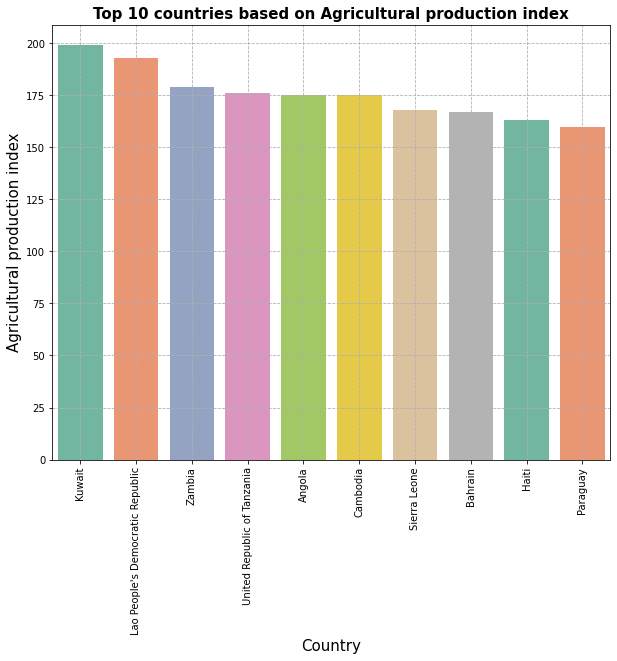

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='country',y='Agricultural production index ',data=df.sort_values('Agricultural production index ',ascending=False).head(10), palette='Set2')
plt.title('Top 10 countries based on Agricultural production index',fontweight='bold',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Agricultural production index',fontsize=15)
plt.xticks(rotation=90)
plt.grid(linestyle="--")
plt.show()

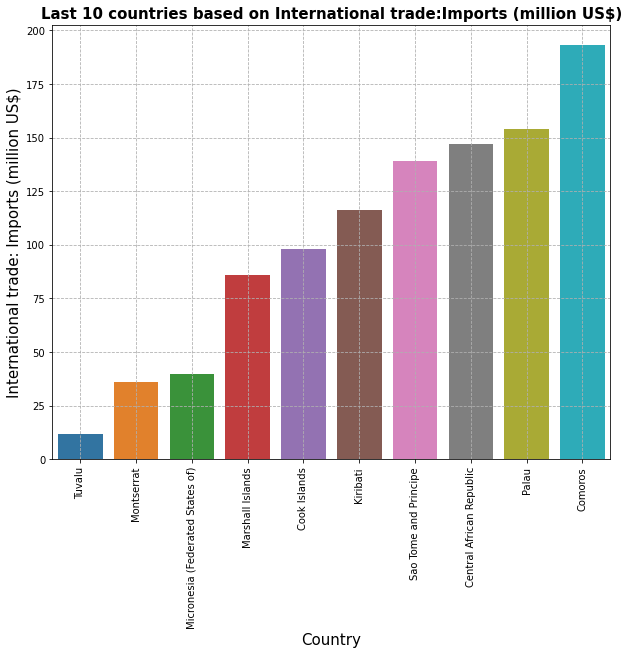

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x='country',y='International trade: Imports (million US$)',data=df.sort_values('International trade: Imports (million US$)',ascending=True).head(10))
plt.title('Last 10 countries based on International trade:Imports (million US$)',fontweight='bold',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('International trade: Imports (million US$)',fontsize=15)
plt.xticks(rotation=90)
plt.grid(linestyle="--")
plt.show()

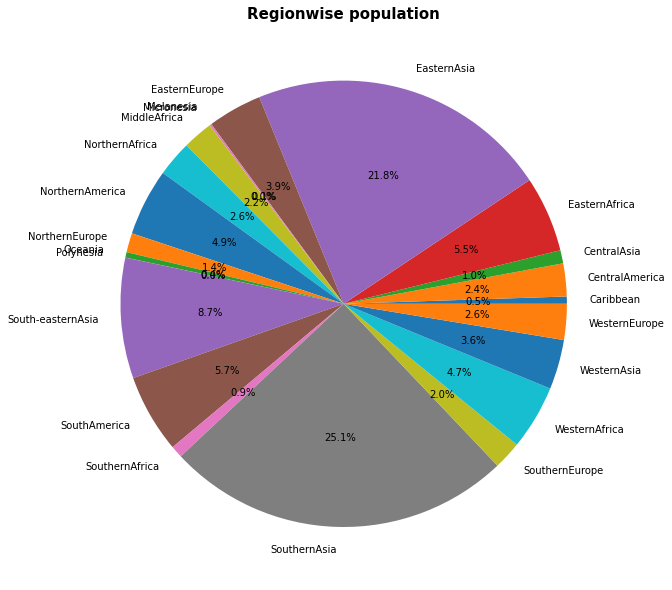

In [14]:
reg = df.groupby("Region").sum()["Population in thousands (2017)"]
plt.figure(figsize = (10, 15))
plt.pie(reg, labels = reg.index, autopct = "%2.1f%%")
plt.title('Regionwise population',fontweight='bold',fontsize=15)
plt.show()

# 3. Find out how many countries with respect to the region



In [25]:
df.groupby("Region")[["country"]].count()

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


# 4. On average which region has the highest


# a. GDP per capita (current US$)

In [28]:
hgdp=df.groupby("Region")[["GDP per capita (current US$)"]].mean()
hgdp.sort_values(by="GDP per capita (current US$)",ascending=False)
hgdp.nlargest(1,"GDP per capita (current US$)")

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.0


# b. International trade: Imports (million US$)


In [30]:
himp=df.groupby("Region")[["International trade: Imports (million US$)"]].mean()
himp.sort_values(by="International trade: Imports (million US$)",ascending=False)
himp.nlargest(1,"International trade: Imports (million US$)")

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.25


# 5.Find out which region has more consistent with respect to GDP per Capita


In [32]:
consistent=df.groupby("Region")[["GDP per capita (current US$)"]].std()
consistent.sort_values(by="GDP per capita (current US$)")
consistent.nsmallest(1,"GDP per capita (current US$)")

,GDP per capita (current US$)
Region,
WesternAfrica,815.095399
